In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [23]:
!pip install pandas
!pip install wordcloud
!pip install streamlit
!pip install scikit-learn
!pip install nltk
!pip install seaborn




In [84]:
x = pd.read_csv("./sms-spam.csv")
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [85]:
x.shape

(5572, 5)

In [86]:
x.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [87]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
x.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [93]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
x

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [90]:
x.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [91]:
x.columns

Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [97]:
x.rename(columns={'v1':'target','v2':'text'},inplace=True)
x

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [99]:
encoder = LabelEncoder()
x['target'] = encoder.fit_transform(x['target'])
x.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
x.isnull().sum()

target    0
text      0
dtype: int64

In [101]:
x.isnull().sum()

target    0
text      0
dtype: int64

In [102]:
x = x.drop_duplicates(keep='first')
x

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [103]:
x.duplicated().sum(
    
)

np.int64(0)

In [104]:
x['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [105]:
653*100.0/5169

12.633004449603405

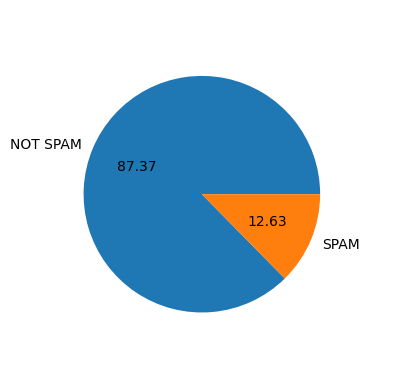

In [106]:
plt.pie(x['target'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [107]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [108]:
import pandas as pd
import nltk

# Download 'punkt' tokenizer (only needs to be done once)
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
import pandas as pd
import nltk
import os

# Define a specific directory for NLTK data.
nltk_data_dir = os.path.join(os.path.expanduser('~'), 'AppData', 'Local', 'nltk_data_custom')

# Add this custom path to NLTK's data search paths
if nltk_data_dir not in nltk.data.path:
    nltk.data.path.append(nltk_data_dir)

print(f"NLTK will now look for data in: {nltk.data.path}")

# Ensure the custom directory exists
os.makedirs(nltk_data_dir, exist_ok=True)

# --- NEW: Download punkt and punkt_tab ---

# Download 'punkt'
try:
    print(f"\nAttempting to download 'punkt' to {nltk_data_dir}...")
    nltk.download('punkt', download_dir=nltk_data_dir)
    print("NLTK 'punkt' tokenizer download successful (or already present at new location).")
except Exception as e:
    print(f"Error during 'punkt' download: {e}")

# Download 'punkt_tab'
try:
    print(f"\nAttempting to download 'punkt_tab' to {nltk_data_dir}...")
    nltk.download('punkt_tab', download_dir=nltk_data_dir)
    print("NLTK 'punkt_tab' tokenizer download successful (or already present at new location).")
except Exception as e:
    print(f"Error during 'punkt_tab' download: {e}")

# --- End NEW section ---


# Verify that punkt and punkt_tab are now found at the custom location
punkt_found_at_custom_path = False
punkt_expected_path = os.path.join(nltk_data_dir, 'tokenizers', 'punkt')
if os.path.exists(punkt_expected_path):
    punkt_found_at_custom_path = True
    print(f"Verified: 'punkt' data folder found at the custom path: {punkt_expected_path}")
else:
    print(f"Warning: 'punkt' data folder NOT found at the expected custom path: {punkt_expected_path}")

punkt_tab_found_at_custom_path = False
punkt_tab_expected_path = os.path.join(nltk_data_dir, 'tokenizers', 'punkt_tab')
if os.path.exists(punkt_tab_expected_path):
    punkt_tab_found_at_custom_path = True
    print(f"Verified: 'punkt_tab' data folder found at the custom path: {punkt_tab_expected_path}")
else:
    print(f"Warning: 'punkt_tab' data folder NOT found at the expected custom path: {punkt_tab_expected_path}")


# Step 2: Sample data
with open("sms-spam.csv", "r", encoding="utf-8") as file:
    lines = file.readlines()

# Create DataFrame
x = pd.DataFrame({'text': [line.strip() for line in lines]})

# Step 3: Feature extraction
try:
    x.loc[:, 'countCharacters'] = x['text'].apply(len)
    x.loc[:, 'countWords'] = x['text'].apply(lambda i: len(nltk.word_tokenize(i)))
    x.loc[:, 'countSentences'] = x['text'].apply(lambda i: len(nltk.sent_tokenize(i)))

    print("\nProcessed DataFrame:")
    print(x)

except LookupError as e:
    print(f"\nLookupError encountered during feature extraction: {e}")
    print("This indicates a tokenizer is still not accessible for tokenization.")
    print("Please check the download output and the verified paths above.")
except Exception as e:
    print(f"\nAn unexpected error occurred during feature extraction: {e}")

NLTK will now look for data in: ['C:\\Users\\yadav/nltk_data', 'c:\\Users\\yadav\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data', 'c:\\Users\\yadav\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data', 'c:\\Users\\yadav\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data', 'C:\\Users\\yadav\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\yadav\\AppData\\Local\\nltk_data_custom']

Attempting to download 'punkt' to C:\Users\yadav\AppData\Local\nltk_data_custom...
NLTK 'punkt' tokenizer download successful (or already present at new location).

Attempting to download 'punkt_tab' to C:\Users\yadav\AppData\Local\nltk_data_custom...
NLTK 'punkt_tab' tokenizer download successful (or already present at new location).
Verified: 'punkt' data folder found at the custom path: C:\Users\yadav\AppData\Local\nltk_data_custom\tokenizers\punkt
Verified: 'punkt_tab' data folder found at the custom path: C:\Users\yadav\AppData\Loc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yadav\AppData\Local\nltk_data_custom...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\yadav\AppData\Local\nltk_data_custom...
[nltk_data]   Package punkt_tab is already up-to-date!



Processed DataFrame:
                                                   text  countCharacters  \
0                                             ﻿v1,v2,,,                9   
1     ham,"Go until jurong point, crazy.. Available ...              120   
2                  ham,Ok lar... Joking wif u oni...,,,               36   
3     spam,Free entry in 2 a wkly comp to win FA Cup...              163   
4     ham,U dun say so early hor... U c already then...               56   
...                                                 ...              ...   
5570  spam,"This is the 2nd time we have tried 2 con...              171   
5571       ham,Will Ì_ b going to esplanade fr home?,,,               44   
5572  ham,"Pity, * was in mood for that. So...any ot...               66   
5573  ham,The guy did some bitching but I acted like...              132   
5574                  ham,Rofl. Its true to its name,,,               33   

      countWords  countSentences  
0              6              

In [111]:
x.loc[:, 'countCharacters'] = x['text'].apply(len)
x.loc[:, 'countWords'] = x['text'].apply(lambda i: len(nltk.word_tokenize(i)))
x.loc[:, 'countSentences'] = x['text'].apply(lambda i: len(nltk.sent_tokenize(i)))

In [112]:
x['countCharacters'] = x['text'].apply(len)


x['countWords'] = x['text'].apply(lambda i:len(nltk.word_tokenize(i)))


#creating a new column with count of sentences
x['countSentences'] = x['text'].apply(lambda i:len(nltk.sent_tokenize(i)))

In [113]:
x.head()

,text,countCharacters,countWords,countSentences
0,"﻿v1,v2,,,",9,6,1
1,"ham,""Go until jurong point, crazy.. Available ...",120,31,2
2,"ham,Ok lar... Joking wif u oni...,,,",36,13,2
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",163,42,2
4,"ham,U dun say so early hor... U c already then...",56,18,1


In [114]:
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5575.000000,5575.000000,5575.000000
mean,88.344036,24.214529,2.098475
std,60.467237,14.289383,1.588380
min,9.000000,4.000000,1.000000
25%,43.000000,14.000000,1.000000
50%,69.000000,20.000000,2.000000
75%,131.500000,32.000000,3.000000
max,917.000000,225.000000,38.000000


In [115]:
x['target'] = 0
import numpy as np
x['target'] = np.random.randint(0, 2, size=len(x))  # Random 0 or 1
# Label result as 0 if word count < 20, else 1
x['target'] = x['countWords'].apply(lambda w: 0 if w < 20 else 1)



In [116]:
x[x['target'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,2656.000000,2656.000000,2656.000000
mean,43.464608,13.864458,1.352410
std,13.293679,3.004905,0.567196
min,9.000000,4.000000,1.000000
25%,34.000000,12.000000,1.000000
50%,42.000000,14.000000,1.000000
75%,52.000000,16.000000,2.000000
max,104.000000,19.000000,4.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

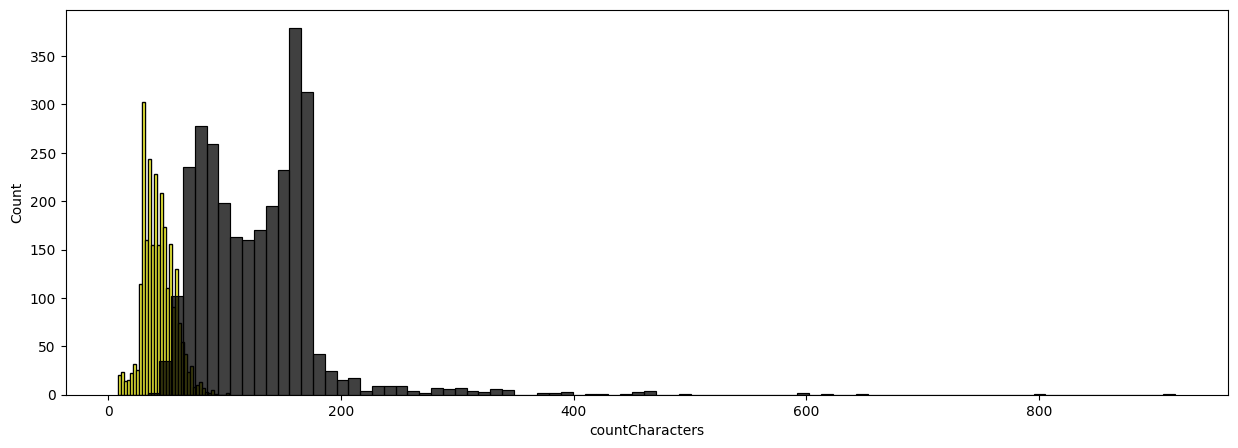

In [118]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['target'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['target'] == 1]['countCharacters'], color = "black")

<Axes: xlabel='countWords', ylabel='Count'>

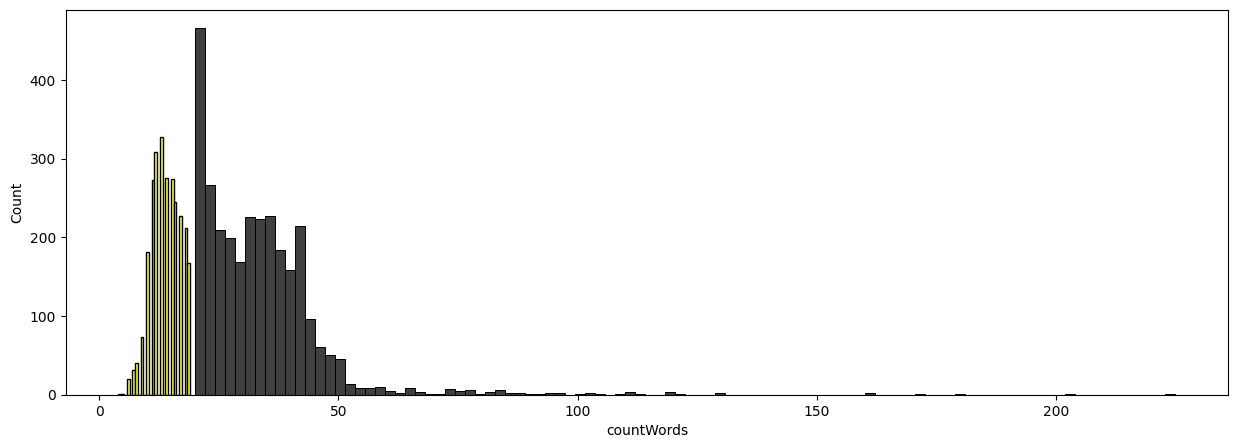

In [119]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['target'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['target'] == 1]['countWords'], color = "black")

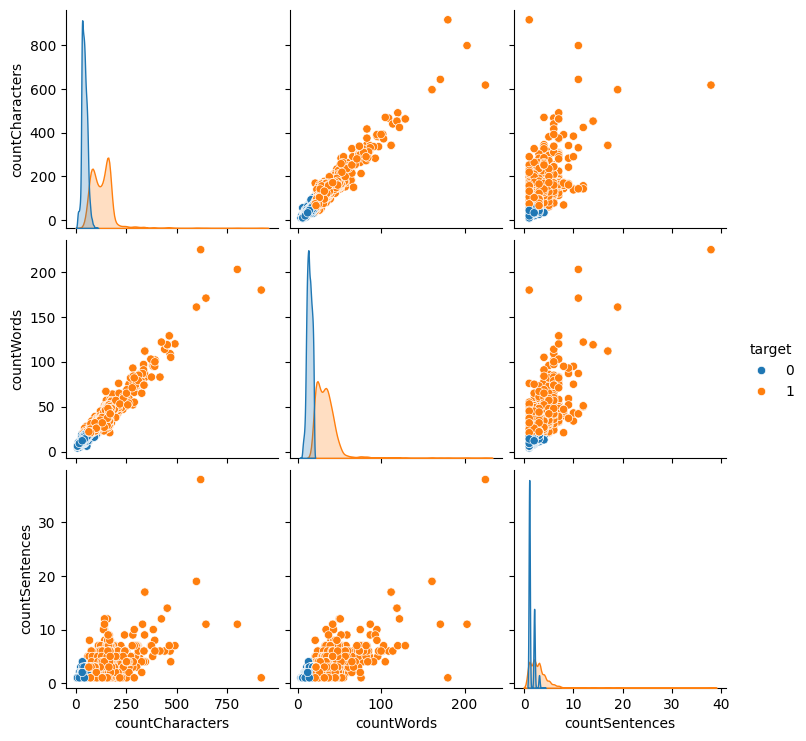

In [120]:
sns.pairplot(x, hue='target')

In [121]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [123]:
x['processed'] = x['text'].apply(transform_text)

#displaying the edited dataframe with a new column 'processed'
x.head()

,text,countCharacters,countWords,countSentences,target,processed
0,"﻿v1,v2,,,",9,6,1,0,v2
1,"ham,""Go until jurong point, crazy.. Available ...",120,31,2,1,ham go jurong point crazi avail bugi n great w...
2,"ham,Ok lar... Joking wif u oni...,,,",36,13,2,0,ham ok lar joke wif u oni
3,"spam,Free entry in 2 a wkly comp to win FA Cup...",163,42,2,1,spam free entri 2 wkli comp win fa cup final t...
4,"ham,U dun say so early hor... U c already then...",56,18,1,0,ham u dun say earli hor u c alreadi say


In [124]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

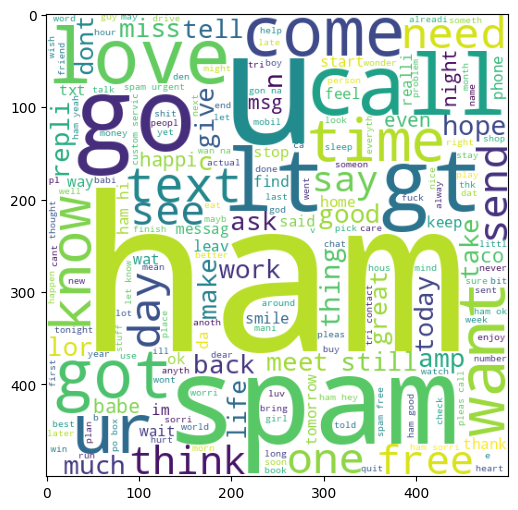

In [125]:
spamWC = wc.generate(x[x['target'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

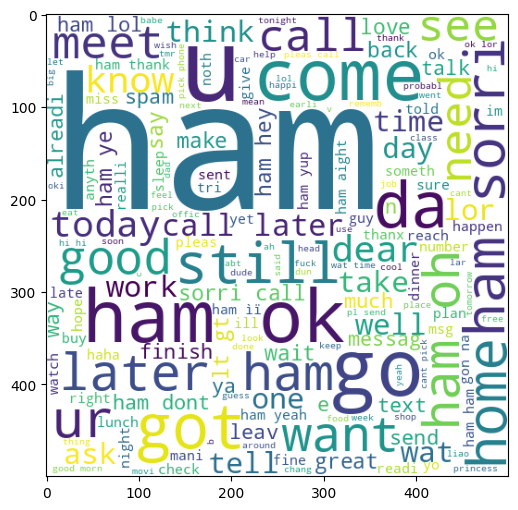

In [126]:
spamWC = wc.generate(x[x['target'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [127]:
spamWords = list()

for msg in x[x['target'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['ham',
 'go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'spam',
 'free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'ham',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'spam',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'ham',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'ham',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'spam',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 '

In [128]:
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('ham', 2210),
 ('u', 872),
 ('spam', 690),
 ('call', 503),
 ('2', 422),
 ('get', 340),
 ('go', 326),
 ('ur', 324),
 ('gt', 276),
 ('lt', 275),
 ('free', 255),
 ('4', 239),
 ('love', 225),
 ('know', 216),
 ('like', 201),
 ('text', 193),
 ('want', 193),
 ('come', 189),
 ('txt', 180),
 ('day', 180),
 ('got', 169),
 ('good', 163),
 ('time', 161),
 ('send', 152),
 ('stop', 149),
 ('repli', 148),
 ('mobil', 144),
 ('need', 141),
 ('one', 141),
 ('r', 128),
 ('think', 127),
 ('see', 127),
 ('n', 124),
 ('today', 121),
 ('take', 119),
 ('make', 116),
 ('tell', 116),
 ('claim', 115),
 ('back', 113),
 ('week', 111)]

In [129]:
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

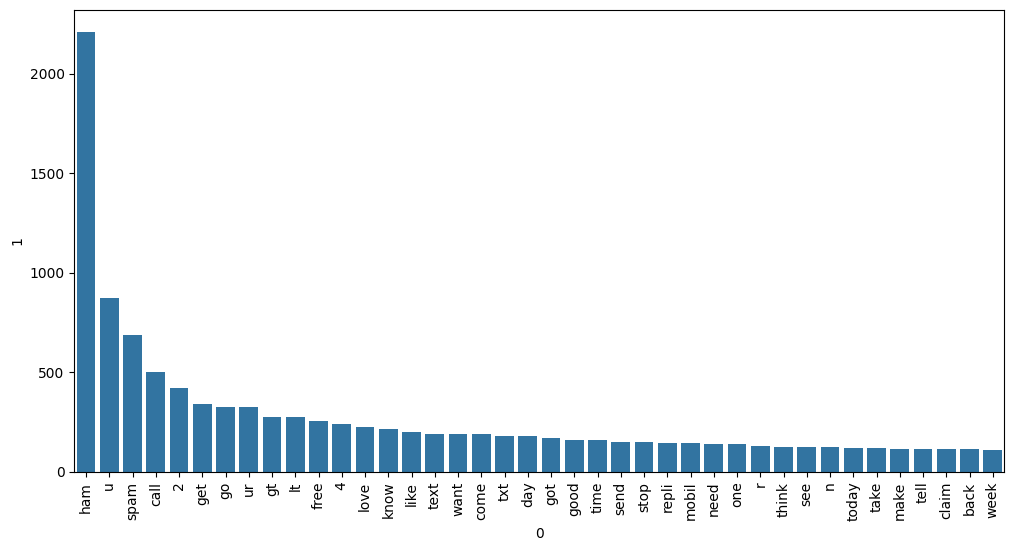

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [131]:
cv = CountVectorizer()

In [132]:
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(5575, 6700)

In [133]:
y = x['target'].values
y

array([0, 1, 0, ..., 1, 1, 0], shape=(5575,))

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)


In [142]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [143]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7390134529147983
[[371 130]
 [161 453]]
0.7770154373927959


In [144]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.7766816143497758
[[490  11]
 [238 376]]
0.9715762273901809


In [145]:
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['target'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)


In [146]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.7390134529147983
[[371 130]
 [161 453]]
0.7770154373927959


In [147]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.7031390134529149
[[329 172]
 [159 455]]
0.7256778309409888


In [79]:
bnb.fit(X_train, y_train) 
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.7926727726894255
[[  0 240]
 [  9 952]]
0.7986577181208053


In [148]:
import pickle

# Safely load the vectorizer from the .pkl file using raw string
file_path = r'C:\Users\yadav\Desktop\Mail_detection\SMS-SPAM-DETECTION-master\vectorizer.pkl'

# Open the file in binary read mode and load the object
with open(file_path, 'rb') as file:
    vectorizer = pickle.load(file)

# Use the loaded vectorizer (e.g., CountVectorizer or TfidfVectorizer)
print("Vectorizer loaded successfully:")
print(vectorizer)


Vectorizer loaded successfully:
TfidfVectorizer()


In [149]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))